This file is meant to allow the app to load the YOLO model and classify images.

The build_yolo function builds the yolo model with our training weights.
The detect_image function takes in an image and then prints the model's predictions back onto the original image and saves it elsewhere.

In [ ]:
def build_yolo():
  """
    Builds the darknet backbone, mounts google drive, 
  """
  # clone darknet repo
  !git clone https://github.com/AlexeyAB/darknet

  # change makefile to have GPU and OPENCV enabled
  %cd darknet
  !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
  !sed -i 's/GPU=0/GPU=1/' Makefile
  !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
  !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

  # verify CUDA
  !/usr/local/cuda/bin/nvcc --version

  # make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
  !make

  # Mount google drive
  %cd ..
  from google.colab import drive
  drive.mount('/content/drive')

  %cd /content/darknet

  # add newly trained weights into darknet
  !cp /path/to/yolov4-obj_final.weights /content/darknet

  # upload the custom .cfg back to cloud VM from Google Drive
  !cp /path/to/yolov4-obj.cfg ./cfg

  # upload the obj.names and obj.data files to cloud VM from Google Drive
  !cp /path/to/obj.names ./data
  !cp /path/to/yolov4/obj.data  ./data

  # need to set our custom cfg to test mode 
  %cd cfg
  !sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
  !sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
  %cd ..

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def detect_image(path):
  # run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
  !./darknet detector test data/obj.data cfg/yolov4-obj.cfg yolov4-obj_final.weights {path} -thresh 0.3
  imShow('predictions.jpg')

In [ ]:
build_yolo()

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.02 MiB | 2.93 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**,

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

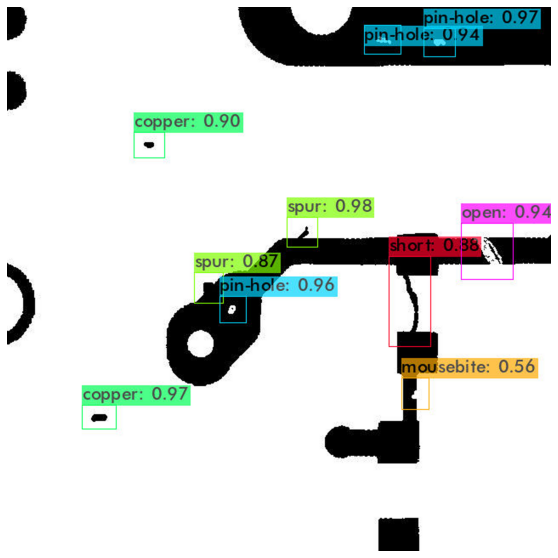

In [ ]:
detect_image('/path/to/test_image.jpg')